In [4]:
#Dict Method

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

vk_cars = []  #will store data in the form of a dict later
file_path = "/Users/user/Desktop/data_sets/vw.csv"

with open(file_path, "r") as volks_wagen:
    print(volks_wagen) 
    reading = csv.reader(volks_wagen, skipinitialspace=True) #reading data set with csv
    next(reading)
    for every_row in reading:
        vk = {}
        vk["model"] = every_row[0]
        vk["year"] = every_row[1]
        vk["price"] = every_row[2]
        vk["transmission"] = every_row[3]
        vk["mileage"] = every_row[4]
        vk["fueltype"] = every_row[5]
        vk["tax"] = every_row[6]
        vk["mpg"] = every_row[7]
        vk["engineSize"] = every_row[8]
        vk_cars.append(vk)
#Printing only the first five cars
for i, car in enumerate(vk_cars[:5]):
    print(f"Record {i + 1}: {car}")




<_io.TextIOWrapper name='/Users/user/Desktop/data_sets/vw.csv' mode='r' encoding='UTF-8'>
Record 1: {'model': 'T-Roc', 'year': '2019', 'price': '25000', 'transmission': 'Automatic', 'mileage': '13904', 'fueltype': 'Diesel', 'tax': '145', 'mpg': '49.6', 'engineSize': '2'}
Record 2: {'model': 'T-Roc', 'year': '2019', 'price': '26883', 'transmission': 'Automatic', 'mileage': '4562', 'fueltype': 'Diesel', 'tax': '145', 'mpg': '49.6', 'engineSize': '2'}
Record 3: {'model': 'T-Roc', 'year': '2019', 'price': '20000', 'transmission': 'Manual', 'mileage': '7414', 'fueltype': 'Diesel', 'tax': '145', 'mpg': '50.4', 'engineSize': '2'}
Record 4: {'model': 'T-Roc', 'year': '2019', 'price': '33492', 'transmission': 'Automatic', 'mileage': '4825', 'fueltype': 'Petrol', 'tax': '145', 'mpg': '32.5', 'engineSize': '2'}
Record 5: {'model': 'T-Roc', 'year': '2019', 'price': '22900', 'transmission': 'Semi-Auto', 'mileage': '6500', 'fueltype': 'Petrol', 'tax': '150', 'mpg': '39.8', 'engineSize': '1.5'}


In [19]:
#NamedTuple

import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import namedtuple


vk_cars = []

Cars = namedtuple("Cars", "model year price transmission mileage fueltype tax mpg engineSize")
file_path = "/Users/user/Desktop/data_sets/vw.csv"

with open(file_path, "r") as volks_wagen:
    print(volks_wagen)
    reading = csv.reader(volks_wagen, skipinitialspace=True)

    next(reading) #skips the column headers
    for every_row in reading:
        new_car = Cars(every_row[0], every_row[1], every_row[2], every_row[3], every_row[4], every_row[5], every_row[6], every_row[7], every_row[8])
        vk_cars.append(new_car)
#for h, car in enumerate(vk_cars[:5]):
    #print(f"Record {h + 1}: {car}")


#1. What is the most expensive VW car listed?

most_expensive_vk = None
highest_price = 0

for car in vk_cars:
    price = float(car.price)

    if price > highest_price:
        highest_price = price
        most_expensive_vk = car

if most_expensive_vk is not None:
    print("The most expensive VK car is:")
    print("Model:", most_expensive_vk.model)
    print("Year:", most_expensive_vk.year)
    print("Price:", most_expensive_vk.price)
    print("Transmission:", most_expensive_vk.transmission)
    print("Mileage:", most_expensive_vk.mileage)
    print("Fuel Type:", most_expensive_vk.fueltype)
    print("Tax:", most_expensive_vk.tax)
    print("MPG:", most_expensive_vk.mpg)
    print("Engine Size:", most_expensive_vk.engineSize)
else:
    print("No VK cars found in the dataset.")

#2. Find all the VW Golf models. What is their average price?

count = 0
total_p = 0

for car in vk_cars:
    if car.model == "Golf":
        price = float(car.price)
        total_p += price
        count += 1

if count > 0:
    avg_price = total_p / count
    print(f"The average price of VW Golf Models is {avg_price:.2f}£")
else:
    print("No Golf models found")


# 3. What is the average milage for VW Polo models registered in 2020?

count = 0
total_ml = 0

for car in vk_cars:
    if car.model == "Polo" and car.year == "2020":
        mileage = int(car.mileage)
        total_ml += mileage
        count += 1

if count > 0:
    avg_ml = total_ml / count
    print(f"The average mileage covered by the Polo model in 2020 is {avg_ml:.2f} miles")
else:
    print("No VW Polo models mileage were found in 2020")



<_io.TextIOWrapper name='/Users/user/Desktop/data_sets/vw.csv' mode='r' encoding='UTF-8'>
The most expensive VK car is:
Model: California
Year: 2019
Price: 69994
Transmission: Semi-Auto
Mileage: 3544
Fuel Type: Diesel
Tax: 260
MPG: 29.1
Engine Size: 2
The average price of VW Golf Models is 16689.69£
The average mileage covered by the Polo model in 2020 is 2199.90 miles


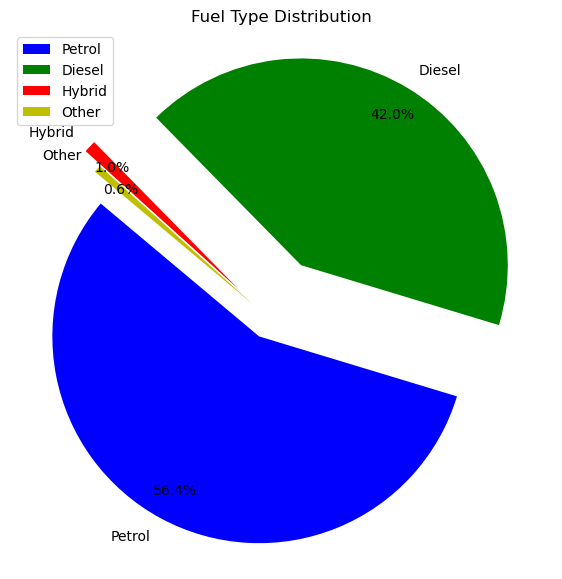

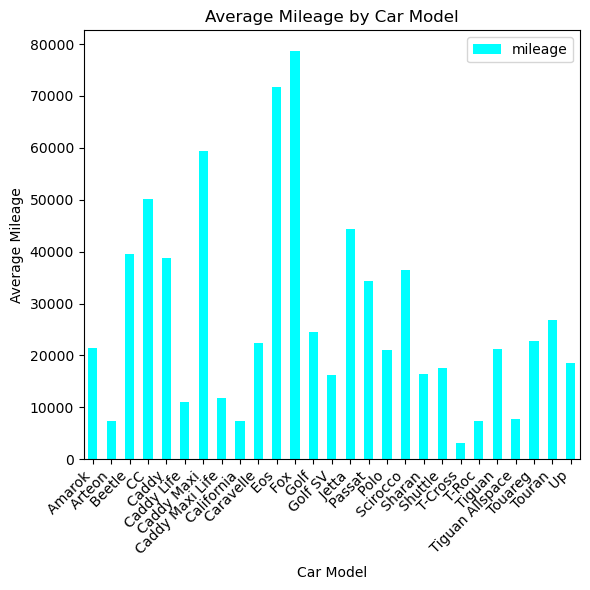

In [35]:
#Extensions

#Extension: Using pandas and matplotlib , create the following:
#1. A pie chart showing the distribution between fuel types. (You can use the model column
#to count occurances!)
#2. A bar chart showing the average mileage for each model. (You need to research how
#can you calculate average using pandas!)


import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/user/Desktop/data_sets/vw.csv"
vk_cars = pd.read_csv(file_path)

vk_cars

fuel_type = vk_cars["fuelType"].value_counts()
labels = fuel_type.index
explode = [.1,.3,.2,.1]
plt.figure(figsize=(7,7))
plt.title("Fuel Type Distribution", rotation=360)
colors=['b','g','r','y']
plt.pie(fuel_type, labels=labels, autopct='%.1f%%', explode=explode, colors=colors, startangle=140, pctdistance=0.85)

plt.axis('equal')
plt.legend()
plt.show()


#4
average_mileage = vk_cars.groupby('model')['mileage'].mean()

plt.figure(figsize=(6, 6))
average_mileage.plot(kind='bar', color='cyan')
plt.title('Average Mileage by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Average Mileage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.legend()
plt.show()



